<a href="https://colab.research.google.com/github/bajpaidivyanshi2005-sketch/OIBSIP/blob/main/LEVEL_1_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load & Inspect Data**

In [ ]:
import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv")
print(df.shape)
print(df.columns)
df.head()


(29203, 16)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


# **Check for Missing Values**

In [ ]:
df.isnull().sum()


,0
id,0
name,16
host_id,1
host_name,19
neighbourhood_group,1
neighbourhood,1
latitude,1
longitude,1
room_type,1
price,1


# ** Handle Missing Values**

In [ ]:
# Fill missing reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Fill missing last_review with a placeholder or drop
df['last_review'] = df['last_review'].fillna("No Review")

# Drop rows with critical nulls if needed
df.dropna(subset=['name', 'host_name'], inplace=True)


# **Check for Duplicates**

In [ ]:
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

# Remove duplicates
df = df.drop_duplicates()


Duplicate Rows: 0


# **Handle Incorrect/Extreme Values**

In [ ]:
# Remove listings with 0 or negative price
df = df[df['price'] > 0]

# Cap minimum_nights to remove outliers (e.g., above 365 days)
df = df[df['minimum_nights'] <= 365]


# **Standardize Column Values**

In [ ]:
# Strip whitespace from text columns
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip()
df['room_type'] = df['room_type'].str.strip()


# **Final Summary**

In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 29147 entries, 0 to 29201
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29147 non-null  int64  
 1   name                            29147 non-null  object 
 2   host_id                         29147 non-null  float64
 3   host_name                       29147 non-null  object 
 4   neighbourhood_group             29147 non-null  object 
 5   neighbourhood                   29147 non-null  object 
 6   latitude                        29147 non-null  float64
 7   longitude                       29147 non-null  float64
 8   room_type                       29147 non-null  object 
 9   price                           29147 non-null  float64
 10  minimum_nights                  29147 non-null  float64
 11  number_of_reviews               29147 non-null  float64
 12  last_review                     29147

# **Optional: Visualize Missing Data**

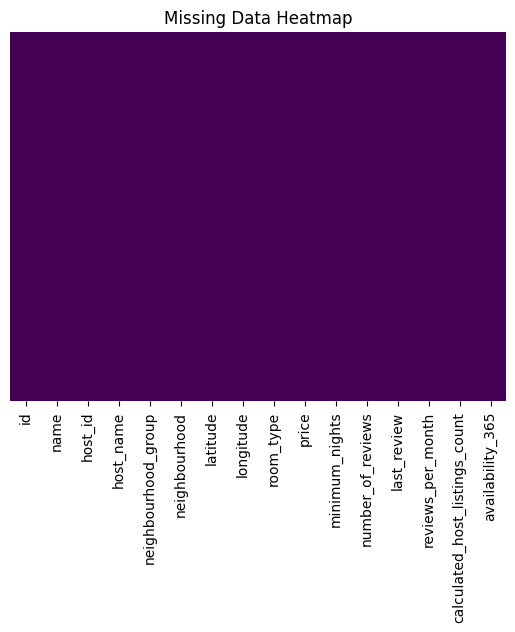

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()
